# Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('sms.tsv',delimiter='\t',names=['label','Messages'])

In [3]:
data['label']=data['label'].map({'ham':0,'spam':1})

In [6]:
data.head()

,label,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.shape

(5572, 2)

# Clean and Prepare Data

In [6]:
import re

In [7]:
def clean(x):
    s=re.sub('[^A-za-z]',' ',x)
    s=re.sub('\s+',' ',s)
    s=s.strip()
    return s.lower()

In [8]:
data['Messages']=data.Messages.apply(clean)

In [9]:
X=data.Messages.values
y=data.label.values

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=12)


In [11]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samarth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords=stopwords.words('english')

In [13]:
if 'not' in stopwords:
    stopwords.remove('not')
    

# Transform text Data into Numeric

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv1=CountVectorizer(stop_words=stopwords)

In [16]:
cv_train=cv1.fit_transform(xtrain).toarray()

In [17]:
cv_test=cv1.transform(xtest).toarray()


# Train Model

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Naive Bayes

In [19]:
nb=MultinomialNB()
nb.fit(cv_train,ytrain)

MultinomialNB()

In [20]:
pred=nb.predict(cv_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm=confusion_matrix(ytest,pred)

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt

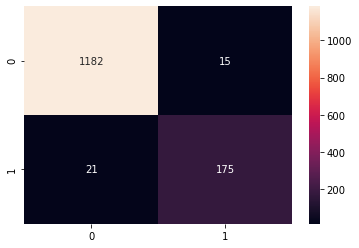

In [24]:
sb.heatmap(cm,annot=True,fmt='d')
plt.show()

# Logistic Regression

In [25]:
log=LogisticRegression(solver='lbfgs',class_weight={1:10})

In [26]:
log.fit(cv_train,ytrain)

LogisticRegression(class_weight={1: 10})

In [27]:
test_score=log.score(cv_test,ytest)
test_score

0.9777458722182341

In [28]:
log_pred=log.predict(cv_test)

In [29]:
confusion_matrix(ytest,log_pred)

array([[1189,    8],
       [  23,  173]], dtype=int64)

# Evaluate Model on Test Data

In [30]:
test=['Get Free tickets.. ! Win cash','hi john I will call you Later']

In [31]:
cleaned_data=[]

In [32]:
for i in test:
    t=clean(i)
    cleaned_data.append(t)

In [33]:
t1=cv1.transform(cleaned_data)

In [34]:
t1.shape

(2, 6491)

In [35]:
nb.predict(t1)

array([1, 0], dtype=int64)

In [36]:
log.predict(t1)

array([1, 0], dtype=int64)